In [42]:
library("igraph")
library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Homework 2

### 1. Generate a tree graph that represents flipping a coin 4 times,  let A be the event “the first outcome is tails” , B the event “ the second outcome is head” and C the event “the third outcome is tails” calculate 

p(AUBUC) = P (A U B U C) = P(A) + P(B) + P(C) - P(A ∩ B) - P(A ∩ C) - P(B ∩ C) + P(A ∩ B ∩ C)

In [41]:
pA <- .5
pB <- .5
pC <- .5
pAnB <- .25
pAnC <- .25
pBnC <- .25
pAnBnC <- .125

pAuBuC <- pA + pB + pC - pAnB - pAnC - pBnC - pAnBnC
print("P(A U B U C)")
pAuBuC


[1] "P(A U B U C)"


[1] 0.625

In [71]:
g <- graph.tree(n = 2^5 - 1, children = 2) 
##Lets add the node labels
n_l = c("H","T")
node_labels <- c("",replicate(2^4-1,n_l))
edge_labels <- c("1/2")
edge_label2 = replicate(30,edge_labels)
#Assign Color
V(g)$color <- "#C4D8E2"
V(g)$color[c(2,4,5,8:11,16:23)] <- "white"
V(g)$color[3] <- "green"
V(g)$color[6] <- "yellow"
V(g)$color[13] <- "blue"

#assign position
coords <- layout_(g, as_tree())
coord2 = matrix(c(-coords[,2],-coords[,1]),ncol = 2)

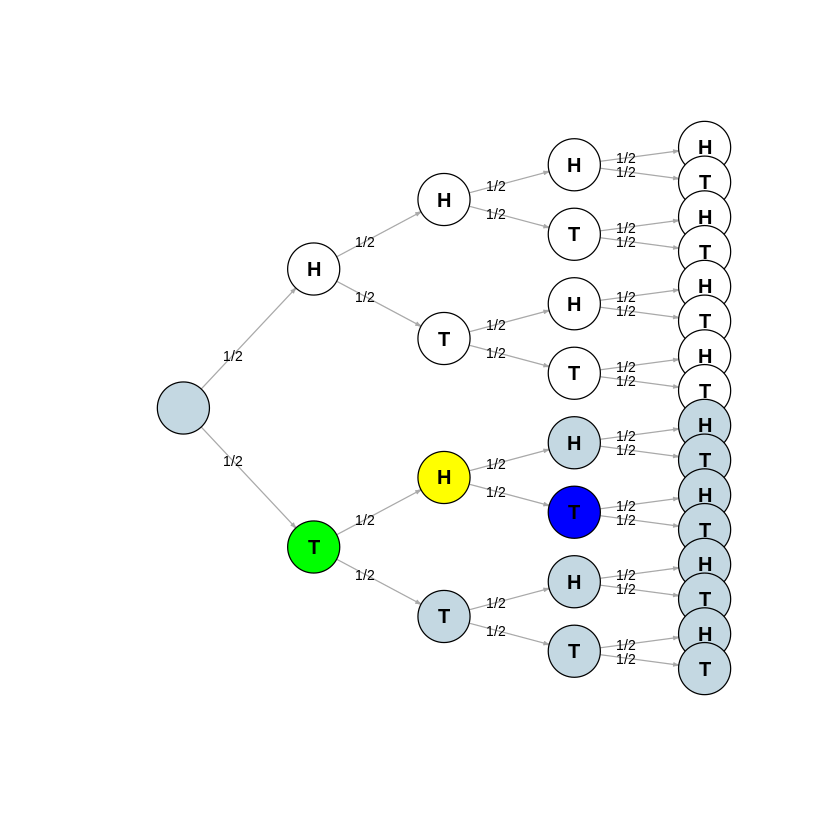

In [72]:
plot(g,
     layout = coord2,           # draw graph as tree
     vertex.size = 20,                  # node size
     vertex.color = V(g)$color,          # node color
     vertex.label = node_labels,        # node labels
     vertex.label.cex = 1,             # node label size
     vertex.label.family = "Helvetica", # node label family
     vertex.label.font = 2,             # node label type (bold)
     vertex.label.color = '#000000',    # node label size
     edge.label = edge_label2,          # edge labels
     edge.label.cex = .7,               # edge label size
     edge.label.family = "Helvetica",   # edge label family
     edge.label.font = 1,               # edge label font type (bold)
     edge.label.color = '#000000',      # edge label color
     edge.arrow.size = 0.2,              # arrow size
     edge.arrow.width = 1              # arrow width
)



### 2. From the Dataset Diabetes, construct contingency tables for the following variable combinations:

A: location Vs gender
B: Gender Vs frame
C: Gender Vs Age (Convert age to an discrete ordinal variable with three categories)
D: Cholesterol Vs Age (Convert age and cholesterol to an discrete ordinal variable with three categories)

calculate the joint and marginal probabilities, and from the above contingency tables choose 5 conditional probability examples with the probabilities calculations and one or two sentences explaining the results.

In [65]:
diabetes = read.csv(file = "diabetes.csv")
sort(unique(diabetes$age))


[1] 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
[26] 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
[51] 69 70 71 72 73 74 75 76 78 79 80 81 82 83 84 89 91 92

## A: Gender & Location

In [75]:
diabetes.sex.location.df <-
  diabetes %>%
  group_by(gender, location) %>%
  summarize(n = n())
#diabetes.sex.location.df

#### Basic Contigency

In [53]:
diabetes.sex.location.df %>%
  dcast(gender ~ location, value.nar = "n") %>%
  kable(align = "l", format = "markdown",
        table.attr='class="table table-striped table-hover"')

Using n as value column: use value.var to override.




|gender |Buckingham |Louisa |
|:------|:----------|:------|
|female |114        |120    |
|male   |86         |83     |

#### Joint

In [85]:
diabetes.sex.location.prop.df <- 
  diabetes.sex.location.df %>%
  ungroup() %>%
  mutate(prop = n / sum(n))

diabetes.sex.location.prop.df %>%
  dcast(gender ~ location, value.var = "prop") %>%
  kable(align = "l", format = "markdown", 
        table.attr = 'class="table table-striped table-hover"')



|gender |Buckingham |Louisa    |
|:------|:----------|:---------|
|female |0.2828784  |0.2977667 |
|male   |0.2133995  |0.2059553 |

#### Marginal

In [91]:
Sex.marginal.df <- 
  diabetes.sex.location.prop.df %>%
  group_by(gender) %>%
  summarize(marginal = sum(prop))

Location.marginal.df <- 
  diabetes.sex.location.prop.df %>%
  group_by(location) %>%
  summarize(marginal = sum(prop))

location,marginal
Buckingham,0.4962779
Louisa,0.5037221


In [92]:
diabetes.sex.location.prop.df %>%
  dcast(gender ~ location, value.var = "prop") %>%
  left_join(Sex.marginal.df, by = "gender") %>%
  bind_rows(
    Location.marginal.df %>%
      mutate(gender = "marginal") %>%
      dcast(gender ~ location, value.var = "marginal")
  ) %>%
  kable(align = "l", format = "markdown",
        table.attr = 'class="table table-striped table-hover"')

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”



|gender   |Buckingham |Louisa    |marginal  |
|:--------|:----------|:---------|:---------|
|female   |0.2828784  |0.2977667 |0.5806452 |
|male     |0.2133995  |0.2059553 |0.4193548 |
|marginal |0.4962779  |0.5037221 |NA        |

## B: GENDER & FRAME

#### Basic contigency

In [83]:
diabetes.sex.frame.df <- 
    diabetes %>%
    group_by(gender, frame) %>%
    summarize(n=n())
diabetes.sex.frame.df %>%
    dcast(gender~frame) %>%
    kable(align = "l", format = "markdown",
        table.attr='class="table table-striped table-hover"')


Using n as value column: use value.var to override.




|gender |Var.2 |large |medium |small |
|:------|:-----|:-----|:------|:-----|
|female |7     |42    |116    |69    |
|male   |5     |61    |68     |35    |

#### Joint


In [74]:
diabetes.sex.frame.prop.df <- 
  diabetes.sex.frame.df %>%
  ungroup() %>%
  mutate(prop = n / sum(n))

diabetes.sex.frame.prop.df %>%
  dcast(gender ~ frame, value.var = "prop") %>%
  kable(align = "l", format = "markdown", 
        table.attr = 'class="table table-striped table-hover"')



|gender |Var.2     |large     |medium    |small     |
|:------|:---------|:---------|:---------|:---------|
|female |0.0173697 |0.1042184 |0.2878412 |0.1712159 |
|male   |0.0124069 |0.1513648 |0.1687345 |0.0868486 |

#### Marginal

In [97]:
Sex.marginal.df <- 
  diabetes.sex.frame.prop.df %>%
  group_by(gender) %>%
  summarize(marginal = sum(prop))

Frame.marginal.df <- 
  diabetes.sex.frame.prop.df %>%
  group_by(frame) %>%
  summarize(marginal = sum(prop))

In [98]:
diabetes.sex.frame.prop.df %>%
  dcast(gender ~ frame, value.var = "prop") %>%
  left_join(Sex.marginal.df, by = "gender") %>%
  bind_rows(
    Frame.marginal.df %>%
      mutate(gender = "marginal") %>%
      dcast(gender ~ frame, value.var = "marginal")
  ) %>%
  kable(align = "l", format = "markdown",
        table.attr = 'class="table table-striped table-hover"')

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”



|gender   |Var.2     |large     |medium    |small     |marginal  |
|:--------|:---------|:---------|:---------|:---------|:---------|
|female   |0.0173697 |0.1042184 |0.2878412 |0.1712159 |0.5806452 |
|male     |0.0124069 |0.1513648 |0.1687345 |0.0868486 |0.4193548 |
|marginal |0.0297767 |0.2555831 |0.4565757 |0.2580645 |NA        |

## C: Gender & Age

In [69]:
diabetes.sex.age.df <- 
    diabetes %>%
    group_by(gender, age) %>%
    filter(age <40) %>%
    summarize(n=n())
diabetes.sex.age.df

gender,age,n
female,19,2
female,20,7
female,21,4
female,22,5
female,23,4
female,24,1
female,25,2
female,26,2
female,27,7
female,28,5


### 3. Baye’s Rule

Write a function in R that allows you to use the Baye’s rule for multiple events.

Use it to calculate the following problem:

Different isoforms of fundamental Hormones such as testosterone are relatively associated to behavioral differences in humans such as extreme aggression.  In a study where 75 % of the participants had the Isoform A, and 25 % had the isoform B. 54 people exhibited extreme aggression out 95  that had Isoform A, and 34 people with extreme aggression out of 90 that had the isoform B. 

Calculate the probability that someone with the isoform A exhibits extreme aggression. 
Calculate the probability that someone with the isoform B exhibits extreme aggression. 
Baye's rule

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

A1 = isoform A<br>
A2 = isoform B<br>
B = Agression<br>
P(A1) = .75<br>
P(A2) = .25<br>
P(B|A1) = 54/95<br>
P(B|A2) = 34/90<br>
We are looking for P(A1|B) (given extreme aggression what is likelihood person has Isoform A)<br>
We are looking for P(A2|B) (given extreme aggression what is likelihood person has Isoform B)<br>
P(A1|B) =(  P(B|A1) * P(A1) ) / (( P(B|A1) * P(A1) ) + ( P(B|A2) * P(A2) )) <br>



In [99]:
pA1 = .75 # P(A1)
pA2 = .25 # P(A2)
pB_A1 = 54/95 # P(B|A1)
pB_A2 = 34/90 # P(B|A2)

pA1_B = (pB_A1 * pA1) / ( (pB_A1 * pA1) + (pB_A2 * pA2))

pA1_B # P(A1|B)
pA2_B = (pB_A2 * pA2) / ( (pB_A1 * pA1) + (pB_A2 * pA2))

pA2_B

[1] 0.8186412

[1] 0.1813588